<a href="https://colab.research.google.com/github/rebeccabosneac/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Rebecca Amaya

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
import missingno as msno

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fpath = '/content/drive/MyDrive/CodingDojo/Projects/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

### 1) How many rows and columns?

In [6]:
df.shape

(8523, 12)

There are 8523 rows and 12 columns.

### 2) What are the datatypes of each variable?

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3) Are there duplicates? If so, drop any duplicates.

In [8]:
df.duplicated().sum()

0

### 4) Identify missing values.

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

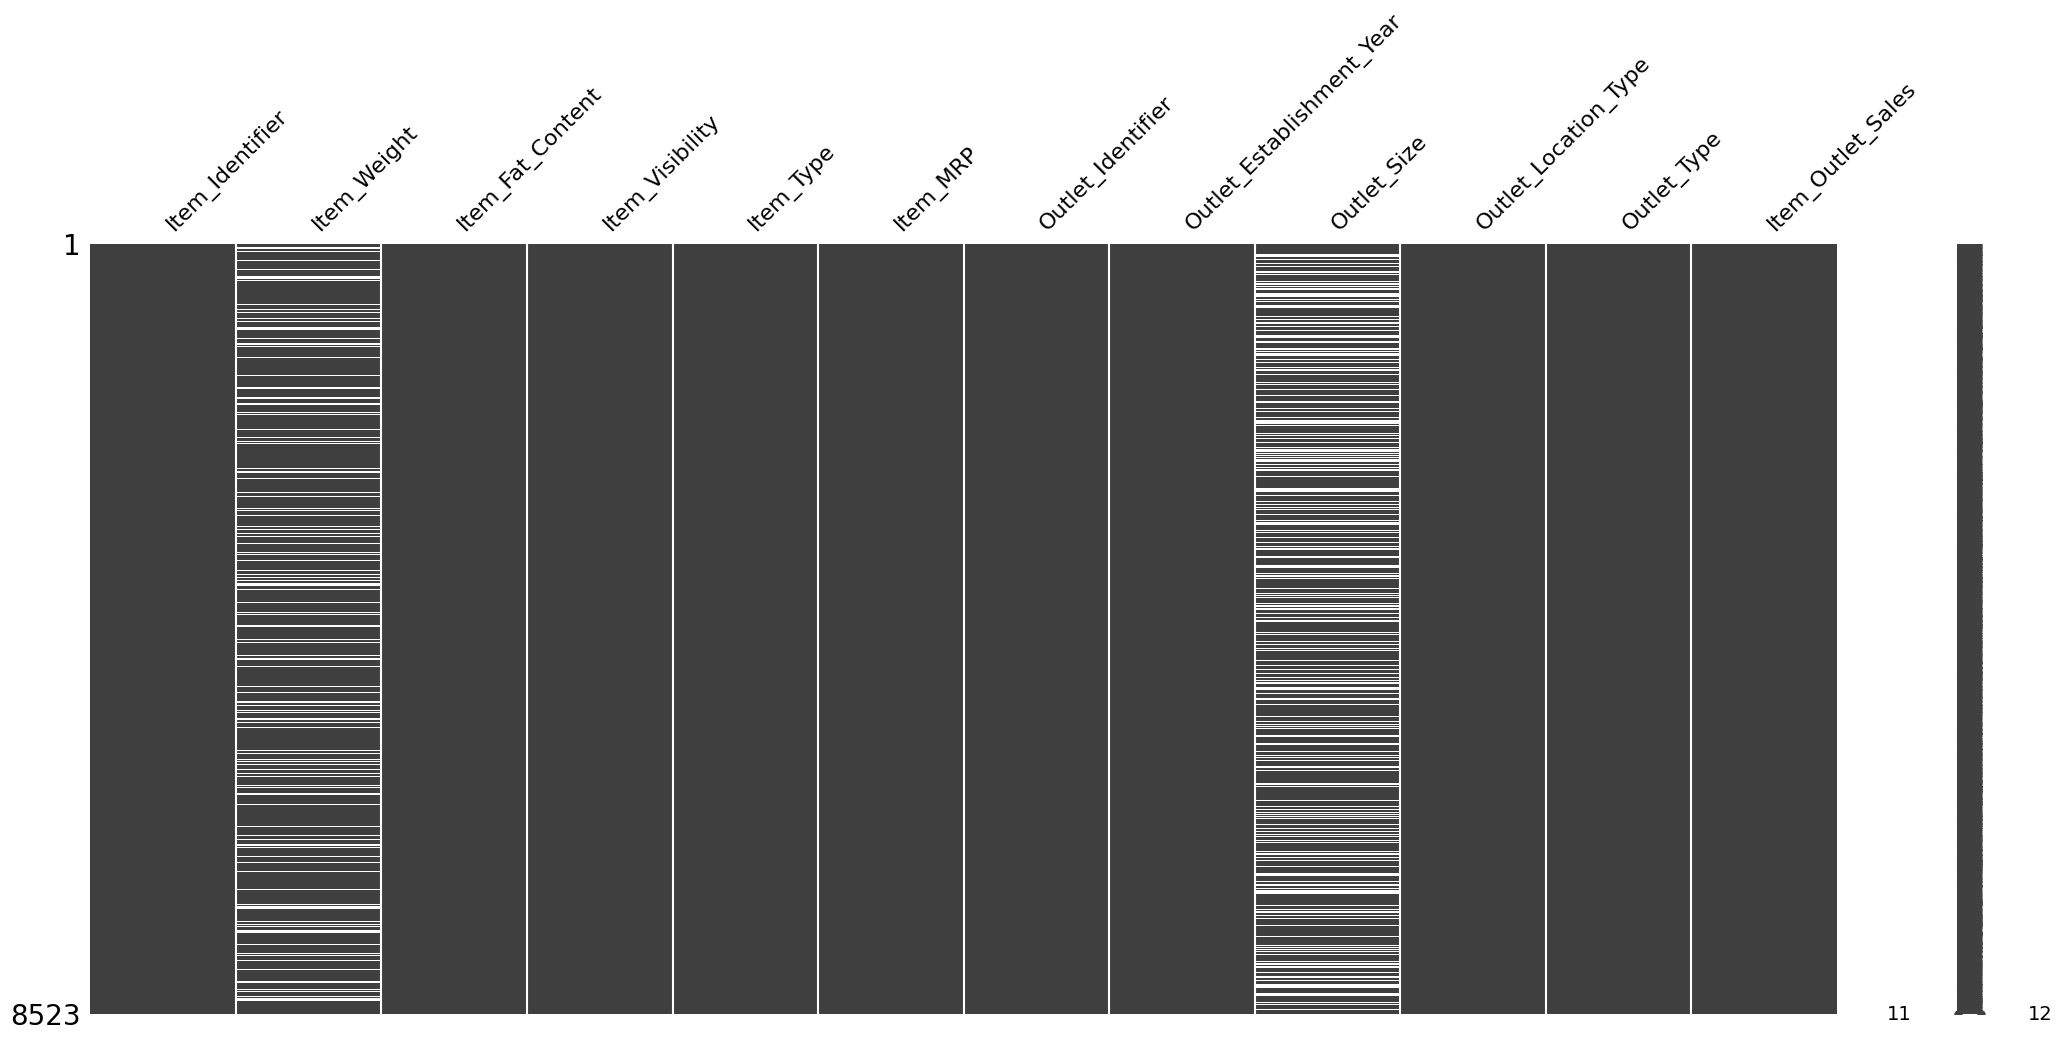

In [11]:
msno.matrix(df);

### 5) Address the missing values by using a placeholder value.

In [12]:
num_cols = df.select_dtypes('number').columns
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].value_counts(dropna=False)

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [13]:
cat_cols = df.select_dtypes('object').columns
df['Outlet_Size'] = df['Outlet_Size'].fillna("Unknown")
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

### 6) Confirm that there are no missing values after addressing them.

In [14]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

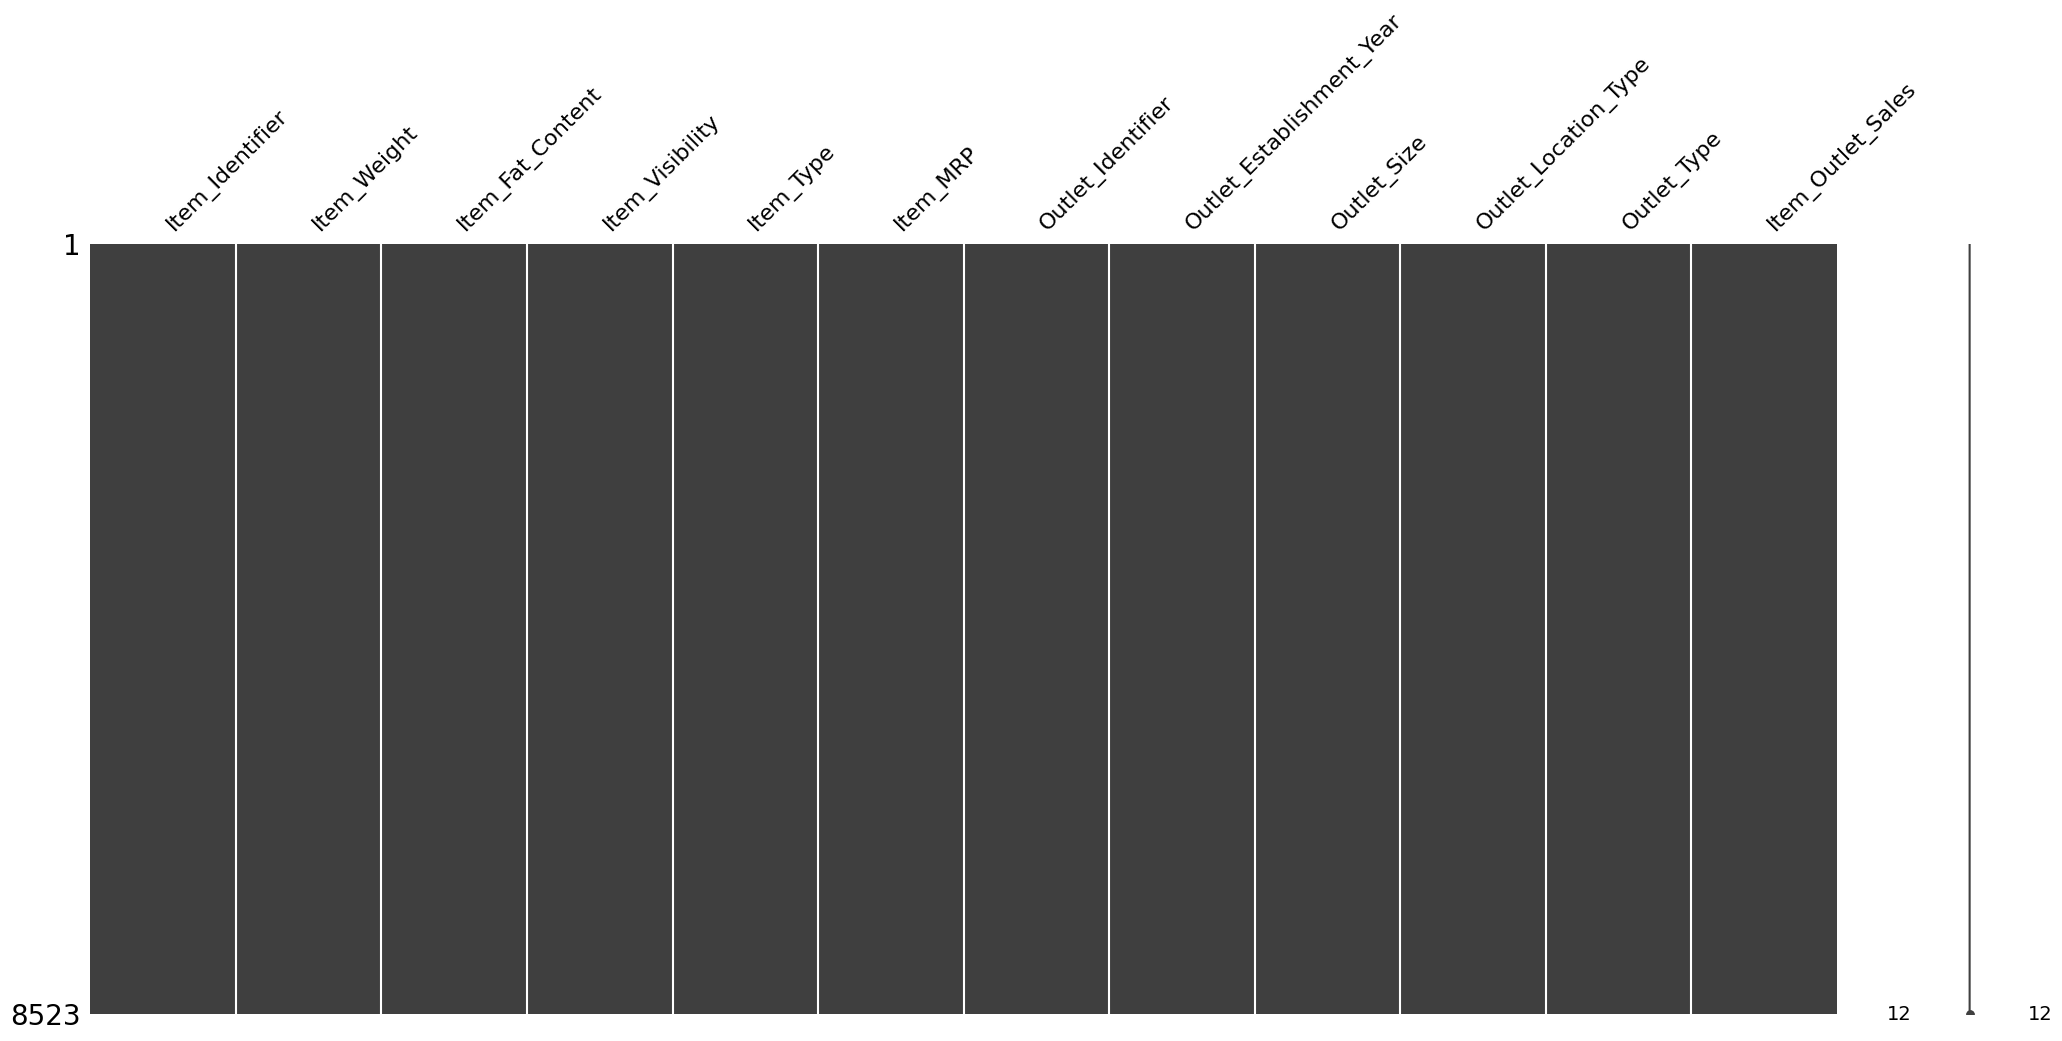

In [15]:
msno.matrix(df);

### 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [16]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

In [18]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

### For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Histograms

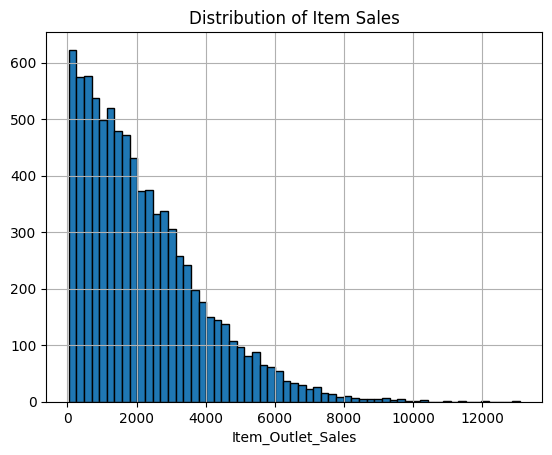

In [24]:
ax = df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Sales')
ax.set_xlabel('Item_Outlet_Sales');

This graph shows that the most sales tend to skew in the lower price range.

### Boxplots

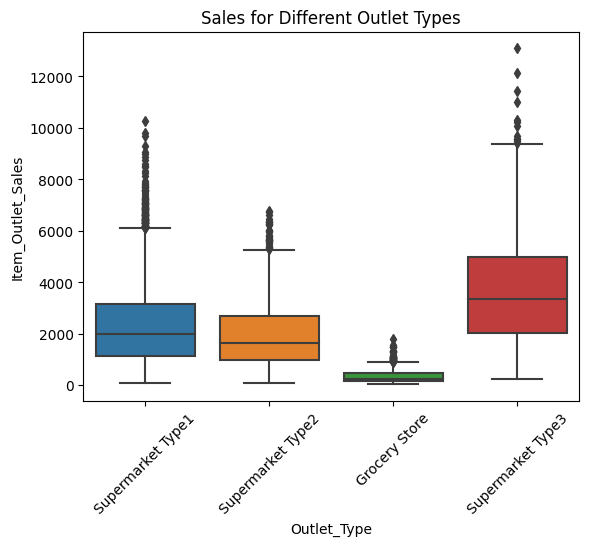

In [25]:
ax = sns.boxplot( data=df, x='Outlet_Type', y='Item_Outlet_Sales')
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Sales for Different Outlet Types");

This Boxplot shows that grocery store has the lowest sales of any outlet type and supermarket type 3 has the highest.

### Countplots

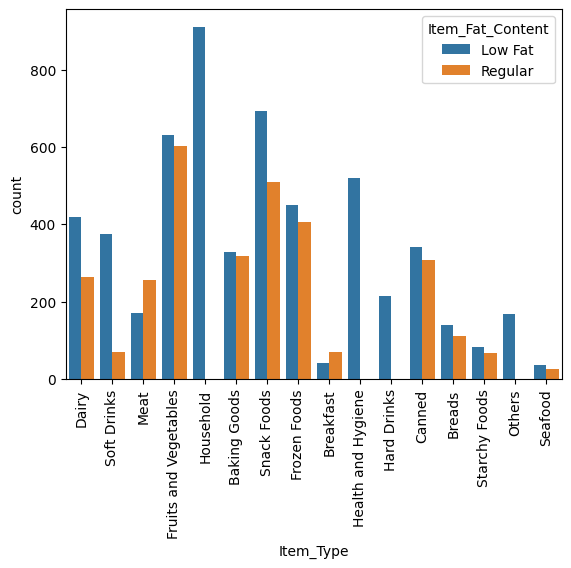

In [26]:
ax = sns.countplot(data=df, x='Item_Type', hue='Item_Fat_Content')
ax.tick_params(axis='x', rotation = 90)

The graph above shows all available item types and if splits them up by their fat content and low fat is the more abundant of the two.

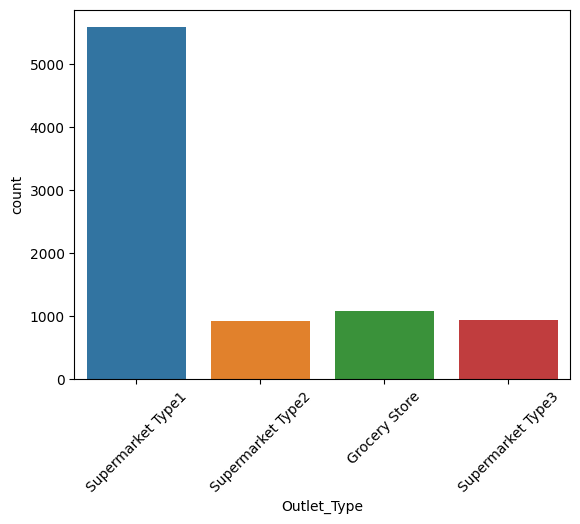

In [27]:
ax = sns.countplot(data=df, x='Outlet_Type')
ax.tick_params(axis='x', rotation = 45)

This countplot the number of outlet types that appear in the data with supermarket type 1 being the most abundant.

### Heatmap

In [28]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


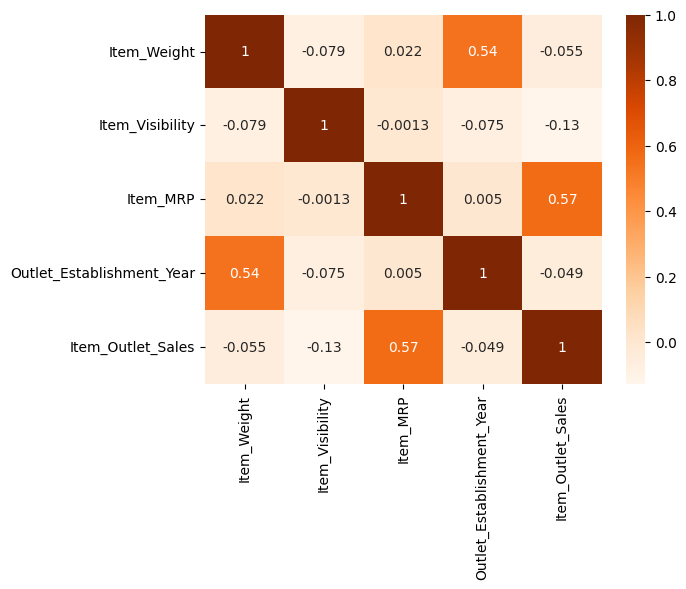

In [29]:
sns.heatmap(corr, cmap = 'Oranges', annot = True);

There are a few moderate correlations shows here.


Outlet_Establishment_Year has .52 correlation with Item_Weight

Item_MRP has .57 correlation with Item_Outlet_Sales

## Feature Inspection

In [30]:
placeholder_weight = df['Item_Weight'] < 0
placeholder_weight.sum()

1463

In [31]:
df.loc[placeholder_weight,'Item_Weight'] = np.nan
placeholder_weight = df['Item_Weight'] < 0
placeholder_weight.sum()

0

In [32]:
placeholder_size = df['Outlet_Size'] == 'Unknown'
placeholder_size.sum()

2410

In [33]:
df.loc[placeholder_size,'Outlet_Size'] = np.nan
placeholder_size = df['Outlet_Size'] == 'Unknown'
placeholder_size.sum()

0

In [34]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [35]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### For each feature:

- Add a new markdown header.
- Paste the feature's definition from the data dictionary into a markdown cell.
- Create a univariate visualization showing the distribution of values/categories.
  - You may use the EDA functions from the previous lessons or create your own visualizations.
- Answer the following questions from the Feature Inspection lesson in a markdown cell:
 - What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - Is the feature constant or quasi-constant?
 - What is the cardinality? Is it high (>10)?
 - Would we know this feature before the target is determined?
 - Is there a business case/understanding reason to exclude based on our business case?
- Create a multivariate visualization plotting each feature vs. the target.
 - You may use the EDA functions from the previous lessons or create your own visualizations.​
- Answer the following questions from the Feature Inspection lesson in a Markdown cell:
 - Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Does this feature appear to be a predictor of the target?

The target is Item_Outlet_Sales

### Item_Identifier
Description: Product ID

In [38]:
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

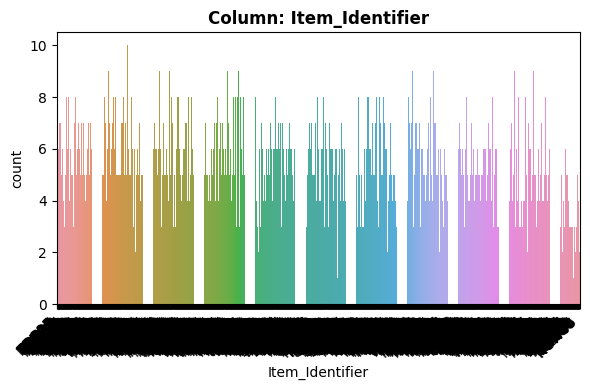

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [39]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 1559. It is high.

5.) Would we know this feature before the target is determined?
- We would not know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- Could exclude due to high cardinality.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

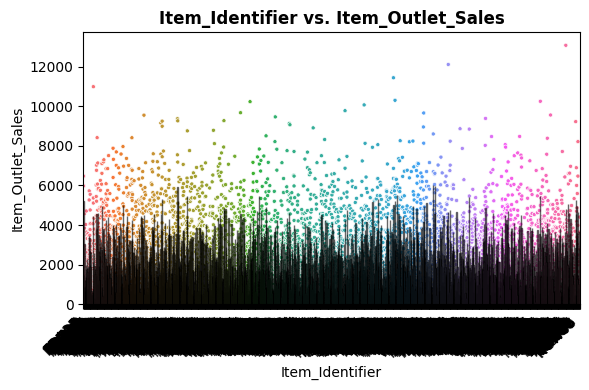

In [40]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did not expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Item_Weight
Description: Weight of product

In [41]:
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

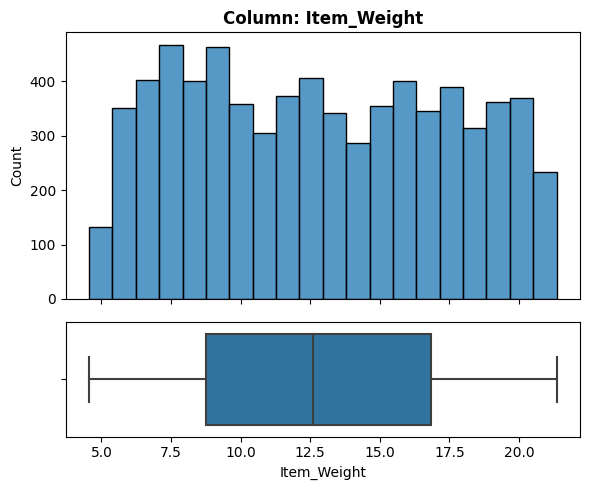

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [42]:
explore_numeric(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 1463 null values which is 17.17%.
- We will impute either the mean or median value.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- N/A (Numeric)

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

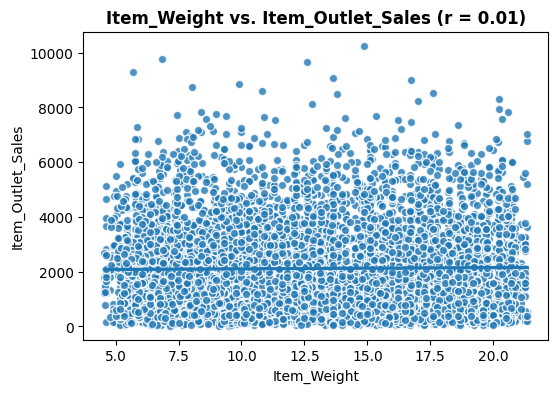

In [43]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did not expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Item_Fat_Content
Description: Whether the product is low-fat or regular

In [44]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

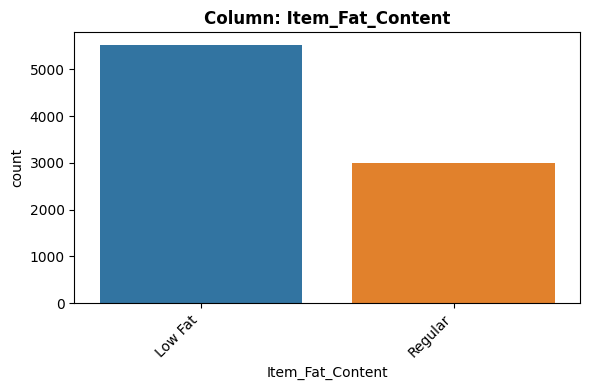

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [45]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 2. This not high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

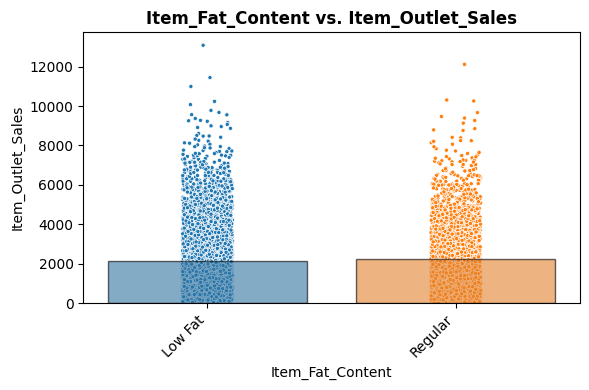

In [46]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did not expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Item_Visibility
Description: The percentage of total display area of all products in a store allocated to the particular product

In [47]:
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

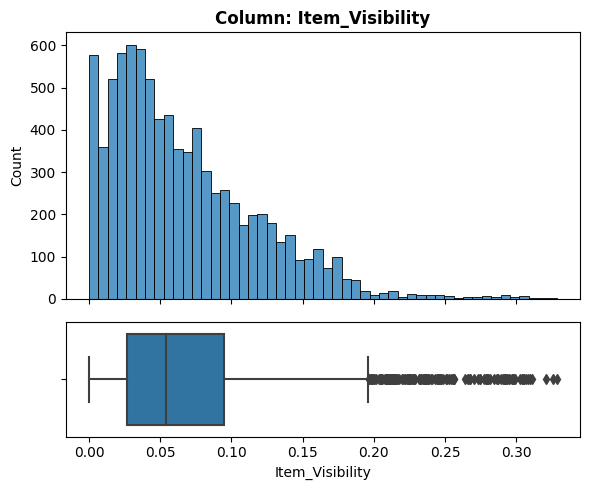

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [48]:
explore_numeric(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- N/A (Numeric)

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

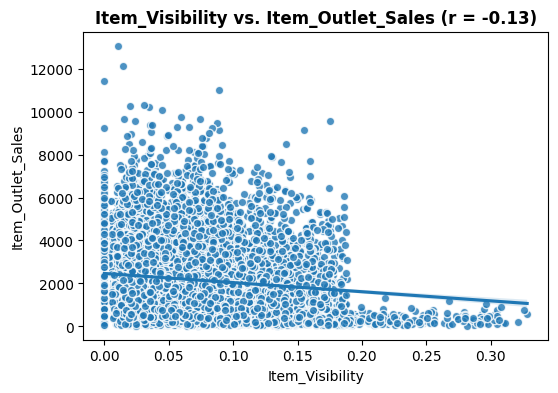

In [49]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Item_Type
Description: The category to which the product belongs

In [50]:
feature = "Item_Type"
df[feature].dtype

dtype('O')

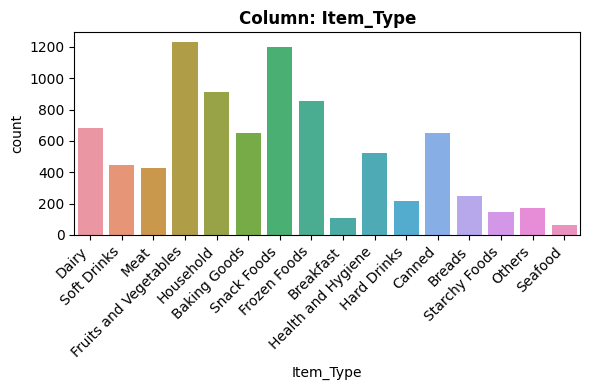

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [51]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 16. This is high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

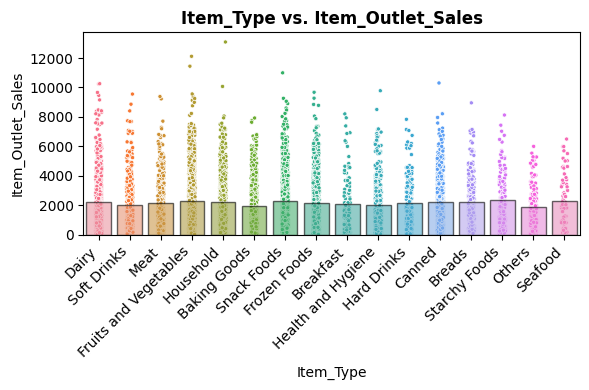

In [52]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Item_MRP
Description: Maximum Retail Price (list price) of the product

In [53]:
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

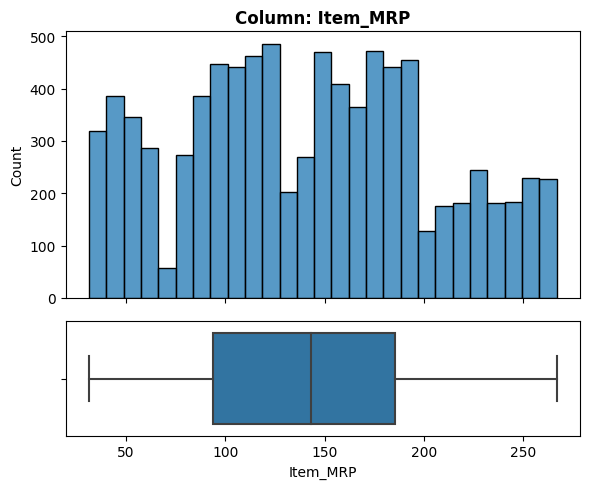

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [54]:
explore_numeric(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- N/A (Numeric)

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

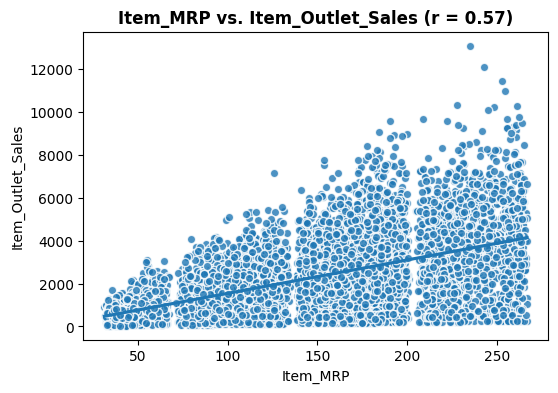

In [55]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is a predictor of the target.

### Outlet_Identifier
Description: Store ID

In [56]:
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

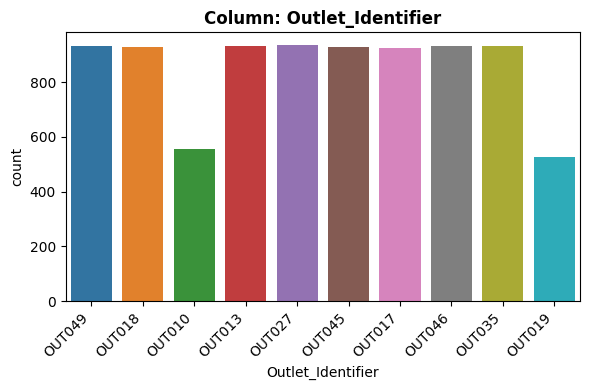

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [57]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 10. This not high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

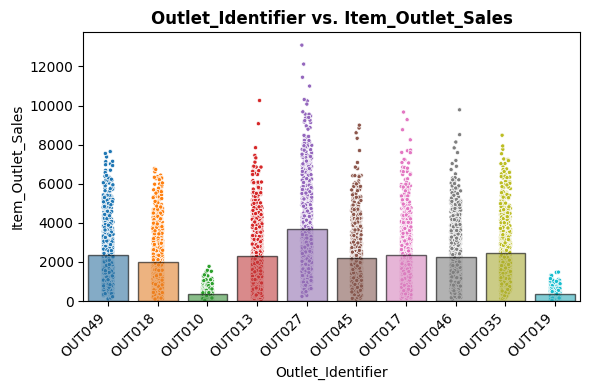

In [58]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did not expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is a predictor of the target.

### Outlet_Establishment_Year
Description: The year in which store was established

In [59]:
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

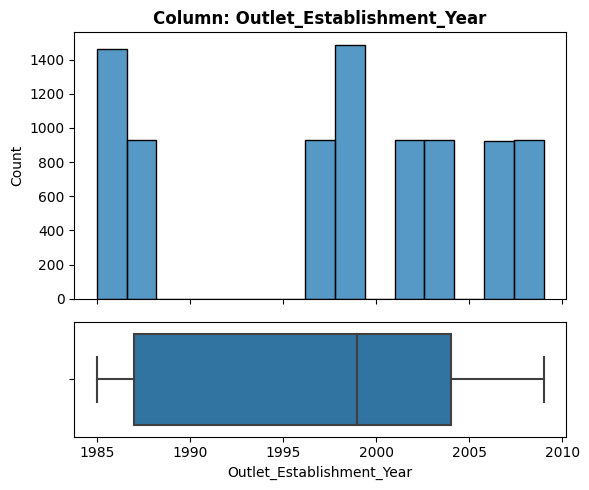

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [60]:
explore_numeric(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- N/A (Numeric)
5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- I will exclude because it can not be changed and will not help predict.

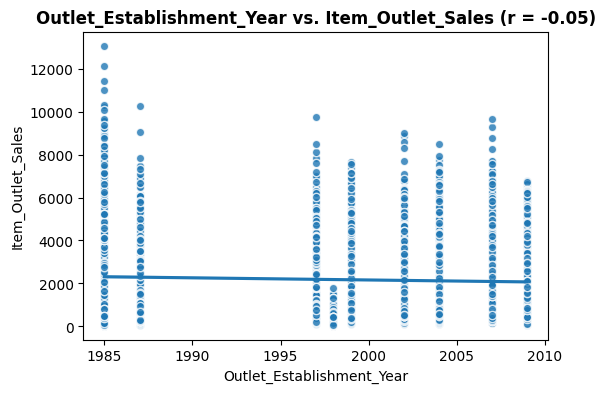

In [61]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did not expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Outlet_Size
Description: The size of the store in terms of ground area covered

In [62]:
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

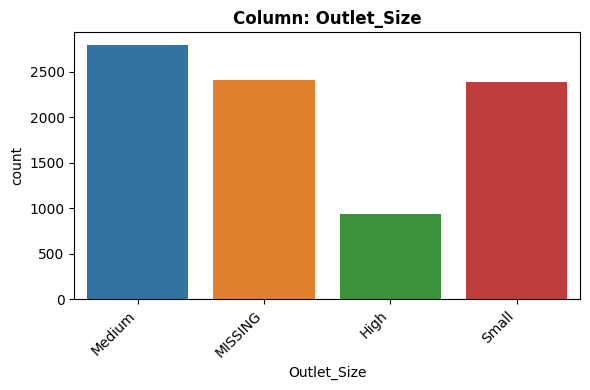

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [63]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Ordinal

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 2410 null values which is 28.28%.
- Because it is ordinal, I will leave it for now.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 4. This not high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

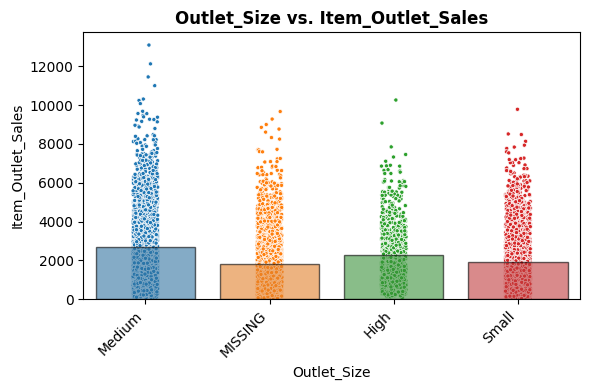

In [64]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Outlet_Location_Type
Description: The type of area in which the store is located

In [65]:
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

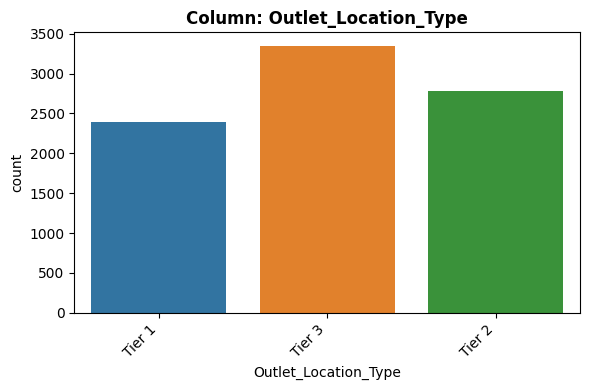

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [66]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Ordinal

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 3. This not high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

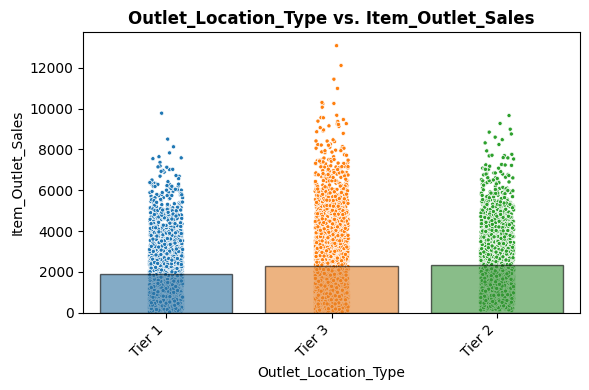

In [67]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is not a predictor of the target.

### Outlet_Type
Description: 	Whether the outlet is a grocery store or some sort of supermarket

In [68]:
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

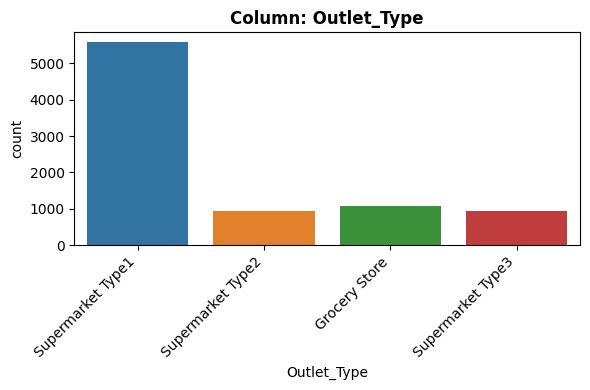

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [69]:
explore_categorical(df,feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical (nominal)

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- The cardinality is 4. This not high.

5.) Would we know this feature before the target is determined?
- We would know this feature before the target was determined.

6.) Is there a business case/understanding reason to exclude based on our business case?
- There is no business reason to exclude this feature.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

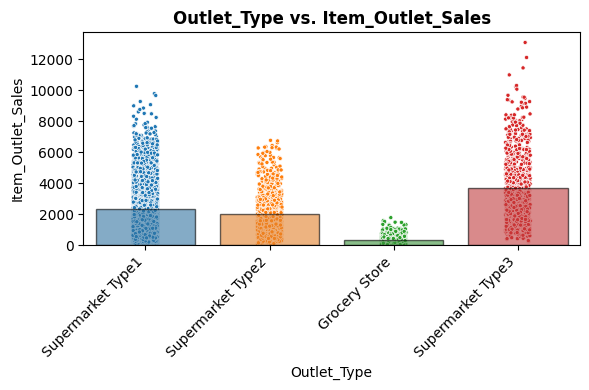

In [70]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- I did expect this feature to be a predictor of the target.

2.) Does this feature appear to be a predictor of the target?
- It is a predictor of the target.

### Item_Outlet_Sales
Description: Sales of the product in the particular store. This is the target variable to be predicted.

In [71]:
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

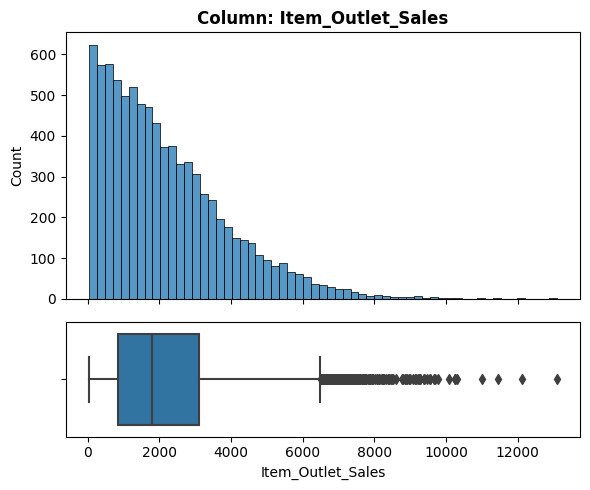

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [72]:
explore_numeric(df, feature);

1.) What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

2.) How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- There are 0 null values.

3.) Is the feature constant or quasi-constant?
- This feature is neither.

4.) What is the cardinality? Is it high (>10)?
- N/A (Numeric)

5.) Would we know this feature before the target is determined?
- This feature is our target

6.) Is there a business case/understanding reason to exclude based on our business case?
- This is our target so we would exclude.

In [73]:
# This is our target so no need to compare it to itself.

1.) Based on your business understanding, would you expect this feature to be a predictor of the target?
- It is the target so yes I would

2.) Does this feature appear to be a predictor of the target?
- It is the target.

## Machine Learning Preprocessing

In [74]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [75]:
fpath = '/content/drive/MyDrive/CodingDojo/Projects/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
df.duplicated().sum()

0

In [78]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [79]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [80]:
# Define features (X) and target (y).
target = 'Item_Outlet_Sales'
# X should include every feature except: "Item_Outlet_Sales and Item_Identifier"
X = df.drop(columns=[target, "Item_Identifier"])
# y should be 'Item_Outlet_Sales'
y = df[target]

In [81]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [82]:
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [83]:
X_train['Outlet_Size'].value_counts(dropna=False)

Medium    2103
NaN       1812
Small     1788
High       689
Name: Outlet_Size, dtype: int64

In [84]:
# Prepare ordinal pipeline
ord_cols = ['Outlet_Size']

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
outlet_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[outlet_order])

# Scaler
scaler = StandardScaler()

# make a pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [85]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [86]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [87]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [88]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(impute_missing, ohe_encoder)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [89]:
# Making a cat_tuple for ColumnTransformer
cat_tuple = ('categorical', cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [90]:
preprocessor = ColumnTransformer([num_tuple, cat_tuple, ord_tuple],
                                    verbose_feature_names_out=False)

In [91]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  O...
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])],
                  verbose_feature_names_out=False)

## Regression Modeling

In [92]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [108]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)
X_test_tf.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
7503,0.331009,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.958796
2957,-1.179892,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.384048
7031,0.378447,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374


In [94]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [95]:
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, lin_reg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 str...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [96]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 str...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [97]:
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.127
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.122
- MSE = 1,194,351.996
- RMSE = 1,092.864
- R^2 = 0.567


#### To what extent is this model overfit/underfit?

##### This model is slightly underfit.

In [98]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [99]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 str...
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [100]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.004
- MSE = 182,456.969
- RMSE = 427.150
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 765.214
- MSE = 1,213,441.995
- RMSE = 1,101.563
- R^2 = 0.560


#### To what extent is this model overfit/underfit?

##### This model is overfit by a good margin.

#### The linear regression model has the best test scores.

In [101]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     O...
                                 

In [102]:
params = {'randomforestregressor__max_depth': [5,10,15,20],
          'randomforestregressor__n_estimators':[10,50,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__min_samples_split':[2,5,10],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [103]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 2, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImpu...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 150, 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [104]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

In [105]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.473
- MSE = 1,153,120.356
- RMSE = 1,073.834
- R^2 = 0.610

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.614
- MSE = 1,095,702.976
- RMSE = 1,046.758
- R^2 = 0.603


### After comparing both random forest models, the tuned model has improved performance.

- Overall, which model do you recommend?
 - The model I recommend is the tuned random forest model.

- Justify your recommendation.
 - I have chosen this model because it performed the best on the test data while beinf only slightly overfit.

In a Markdown cell:

- Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
 - My model is able to explain the target with 60% of variance of data .

- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
 - I will choose MAE

- Include why you selected this metric to explain to your stakeholder.
 - The MAE of my model gets better on the test data in comparison to the training data and it is able to predict approximately on an average sales within $728.614

- Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?
 - Looking at tne training vs testing scores the model is slightly overfit.

## Insights


In [106]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False,
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

### Linear Regression

In [110]:
feature_importance = pd.Series(linreg_pipe.named_steps['linearregression'].coef_, index=feature_names,
                        name='Coefficients')
feature_importance.loc['intercept'] = linreg_pipe.named_steps['linearregression'].intercept_
feature_importance.head()

Item_Weight                 -8.189427e+00
Item_Visibility             -2.166026e+01
Item_MRP                     9.845145e+02
Outlet_Establishment_Year    2.165750e+13
Item_Fat_Content_Low Fat     8.968954e+12
Name: Coefficients, dtype: float64

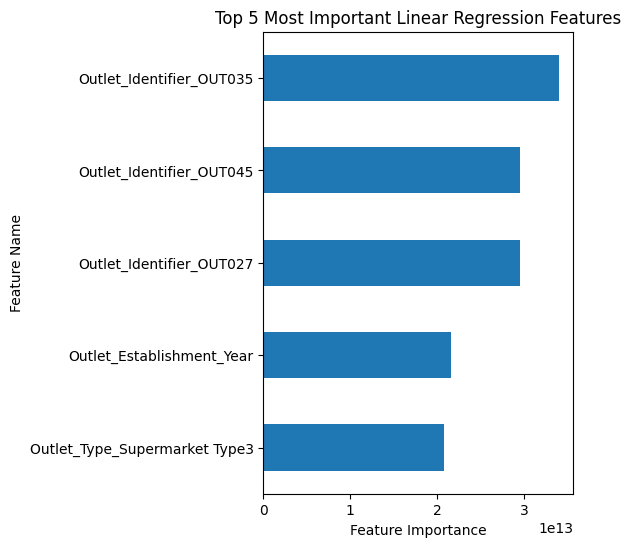

In [111]:
ax = feature_importance.sort_values().tail(5).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 5 Most Important Linear Regression Features');

- The top 3 most important features are:
    - Outlet Identifier OUT035
    - Outlet Identifier OUT035
    - Outlet Identifier OUT035

All three features are specific outlets that have the highest predicted sales and the most importance to sales.

## Tree Based Model

In [112]:
feature_importance = pd.Series(rf_pipe.named_steps['randomforestregressor'].feature_importances_, index=feature_names,
                        name='Feature Importances')
feature_importance.head()

Item_Weight                  0.052669
Item_Visibility              0.099014
Item_MRP                     0.441605
Outlet_Establishment_Year    0.024095
Item_Fat_Content_Low Fat     0.004903
Name: Feature Importances, dtype: float64

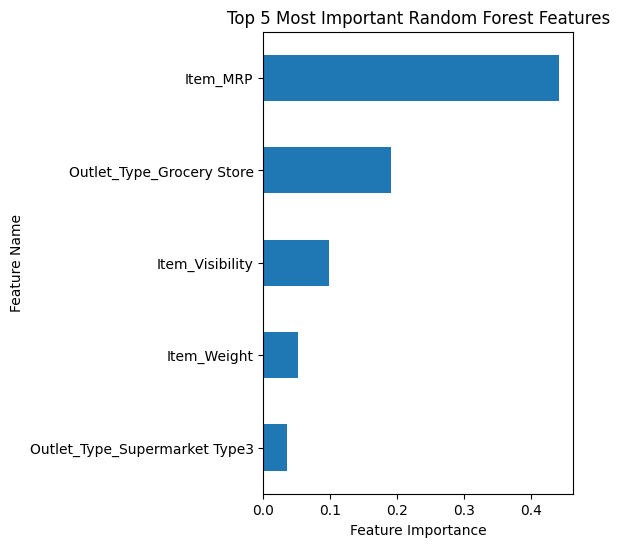

In [114]:
ax = feature_importance.sort_values().tail(5).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 5 Most Important Random Forest Features');

- The top 5 most important features are:
    - Item_MRP - An items maximum retail price has the most importance in this model for sales prediction

    - Outlet_Grocery_Store - This outlet type has more importance to sales prediction than the others do.

    - Item_Visibilty - An items visibilty affects whether the item has good sales or not.

    - Item_Weight - The weight of the item has value in predicting sales.

    - Outlet_Type_Supermarket Type 3 - Of the supermarket types, type 3 has the most importance when it comes to sales predictions.
